In [1]:
# Import Libraries
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
import requests
import json
import schedule
import time
import datetime
import csv
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from twython import Twython
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/suparnasr/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
# Authentication
consumer_Key = 'chie8F9xbOWpMDOxJTolC89yy'
consumer_Secret = 'WUQwRqXd7niAkOEBzZ5iOH76c4NCS6UunTNJ4IUSFuWempLcBQ'
access_Token = '1356292685385105408-yP2gaDQkkHMSSa2hUcjfwSKueKen8v'
access_Token_Secret = 'UlBapYsreywE4CyYARnEJmqDXlV5KrhXhgvWMmQGIoq3E'

auth = tweepy.OAuthHandler(consumer_Key, consumer_Secret)
auth.set_access_token(access_Token, access_Token_Secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [3]:
# Define the search term and the date_since date as variables
search_words = "(online school) OR (online learning) OR (distance learning) OR (online classes) OR (online class) OR (remote learning) OR (blended learning) OR (elearning) OR (online class during covid) OR (zoom class) OR (zoom classes)"
date_since = "2020-02-01"
new_search = search_words + " -filter:retweets"
noOfTweet = 5000

tweets = tweepy.Cursor(api.search, 
                           q=new_search,
                           lang="en",
                           tweet_mode="extended",
                           since=date_since).items(noOfTweet)

users_locs = [[tweet.user.screen_name, tweet.full_text, tweet.user.location, tweet.created_at] for tweet in tweets]
# users_locs

In [4]:
tweet_text = pd.DataFrame(data=users_locs, 
                    columns=['user', "tweet","location", "created at"])
tweet_text

,user,tweet,location,created at
0,tutorshub02,Hire us to do your;\nPsychology\nEssays due\nS...,Chicago,2021-03-23 09:19:33
1,tutorshub02,Hire us to do your;\nPsychology\nEssays due\nS...,Chicago,2021-03-23 09:19:32
2,BishopPerowneCE,Parents' Evening Reminder! 📣 \n\nYear 10 paren...,"Worcester, England",2021-03-23 09:19:30
3,luoTHEBRAVE,"wtf I have gym class on zoom this afternoon, w...",Princess Park,2021-03-23 09:19:23
4,tottwriter,"@alysdragon It's kinda wild, really, that this...","Kent, England",2021-03-23 09:19:19
...,...,...,...,...
4995,taekwonjung,i'm kinda busy with my online classes rn but p...,ENHA TXT LOVE PAGE ☆ 5TEEN,2021-03-23 00:55:32
4996,luckystar5157,@yashar I'm a single mom. I was going to schoo...,"Massachusetts, USA",2021-03-23 00:55:24
4997,hasonshi,The only things I learned during online classe...,Anywhere with Internet,2021-03-23 00:55:19
4998,murakamidevotee,siras making me have a laughing fit in the mid...,| bi | she/her,2021-03-23 00:54:46


In [5]:
tweet_text.describe()

<ipython-input-5-44d7009a5a3a>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  tweet_text.describe()


,user,tweet,location,created at
count,5000,5000,5000,5000
unique,3847,4879,2065,4532
top,MoreenNjue,@XXL I write essays and take online classes (s...,,2021-03-23 09:00:00
freq,41,7,1317,5
first,NaN,NaN,NaN,2021-03-23 00:54:06
last,NaN,NaN,NaN,2021-03-23 09:19:33


In [6]:
# print(tweet_text[tweet_text['location'].str.contains('UAE')])
# print(tweet_text[tweet_text['location'].str.contains('United Arab Emirates')])
# print(tweet_text[tweet_text['location'].str.contains('Dubai')])

Checking for nulls

In [7]:
tweet_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user        5000 non-null   object        
 1   tweet       5000 non-null   object        
 2   location    5000 non-null   object        
 3   created at  5000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 156.4+ KB


In [8]:
empty_loc =  tweet_text['location']!=""
print(empty_loc)

0        True
1        True
2        True
3        True
4        True
        ...  
4995     True
4996     True
4997     True
4998     True
4999    False
Name: location, Length: 5000, dtype: bool


In [9]:
tweet_filter_loc = tweet_text[empty_loc]
print(tweet_filter_loc.shape)

(3683, 4)


In [10]:
tweet_filter_loc

,user,tweet,location,created at
0,tutorshub02,Hire us to do your;\nPsychology\nEssays due\nS...,Chicago,2021-03-23 09:19:33
1,tutorshub02,Hire us to do your;\nPsychology\nEssays due\nS...,Chicago,2021-03-23 09:19:32
2,BishopPerowneCE,Parents' Evening Reminder! 📣 \n\nYear 10 paren...,"Worcester, England",2021-03-23 09:19:30
3,luoTHEBRAVE,"wtf I have gym class on zoom this afternoon, w...",Princess Park,2021-03-23 09:19:23
4,tottwriter,"@alysdragon It's kinda wild, really, that this...","Kent, England",2021-03-23 09:19:19
...,...,...,...,...
4994,byLilyV,#FEATURED #COURSES\nComplete #Python #Develope...,"Bradford, Yorkshire",2021-03-23 00:55:46
4995,taekwonjung,i'm kinda busy with my online classes rn but p...,ENHA TXT LOVE PAGE ☆ 5TEEN,2021-03-23 00:55:32
4996,luckystar5157,@yashar I'm a single mom. I was going to schoo...,"Massachusetts, USA",2021-03-23 00:55:24
4997,hasonshi,The only things I learned during online classe...,Anywhere with Internet,2021-03-23 00:55:19


In [11]:
# nulls = tweet_text.location.str.fullmatch("")
# loc=nulls.to_list()
# i=0
# type(loc)

# x = {k:v for k,v in enumerate(loc) if v == True}
# # type(x)
# pos=list(x)
# pos

In [12]:
print('Number of unique summaries:', len(tweet_filter_loc['tweet'].unique()))

Number of unique summaries: 3610


In [13]:
tweet_filter_loc.drop_duplicates(subset='tweet', keep='first', inplace=True)
tweet_filter_loc.shape

<ipython-input-13-0c02087a02eb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_filter_loc.drop_duplicates(subset='tweet', keep='first', inplace=True)


(3610, 4)

We have removed 73 duplicates

In [14]:
tweet_filter_loc.describe()

<ipython-input-14-3051ded16c26>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  tweet_filter_loc.describe()


,user,tweet,location,created at
count,3610,3610,3610,3610
unique,2784,3610,2059,3359
top,MoreenNjue,Get quality papers at affordable rates and sec...,"New York, USA",2021-03-23 09:14:00
freq,39,1,214,4
first,NaN,NaN,NaN,2021-03-23 00:54:46
last,NaN,NaN,NaN,2021-03-23 09:19:33


In [15]:
# counts = tweet_text.groupby('tweet').size().reset_index(name='count')
# counts[counts['count']>1].sort_values('count', ascending=False)

In [16]:
tweet_filter_loc.shape

(3610, 4)

In [24]:
# d=tweet_filter_loc.location
# a=d.to_list()
# for i in a:
    

In [51]:
# import re
# # print(tweet_text[tweet_text['location'].str.isdecimal()])
# # print(tweet_text[tweet_text['location'].str.isalnum()])
# print(tweet_text[tweet_text['location'].str.isspace()])
# # print(tweet_text[tweet_text['location'].str.contains('')])


                user                                              tweet  \
1751  EliasEssayguru  @_AngeLia_siren Hi, I would love to be of grea...   

     location          created at sentiment  
1751          2021-03-21 20:14:53  positive  


In [27]:
# create TextBlob object of passed tweet text 
def get_sentiment(tweet):
    analysis = TextBlob(tweet) 
    # set sentiment 
    if analysis.sentiment.polarity > 0.0: 
        return 'low'
    elif analysis.sentiment.polarity == 0.0: 
        return 'normal'
    else: 
        return 'high'

In [28]:
# users_locs = [tweet.user.screen_name, tweet.full_text, tweet.user.location, tweet.created_at] 
tweet_sentiments= [get_sentiment(tweet) for tweet in tweet_filter_loc.tweet]
sentiment_dict = {'tweet': tweet_filter_loc.tweet,
                 'sentiment': tweet_sentiments}
tweet_sentiments_df = pd.DataFrame(sentiment_dict)
sent = tweet_sentiments_df['sentiment']
tweet_filter_loc['sentiment'] = sent
tweet_filter_loc

<ipython-input-28-c73291380d63>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_filter_loc['sentiment'] = sent


,user,tweet,location,created at,sentiment
0,tutorshub02,Hire us to do your;\nPsychology\nEssays due\nS...,Chicago,2021-03-23 09:19:33,negative
2,BishopPerowneCE,Parents' Evening Reminder! 📣 \n\nYear 10 paren...,"Worcester, England",2021-03-23 09:19:30,neutral
3,luoTHEBRAVE,"wtf I have gym class on zoom this afternoon, w...",Princess Park,2021-03-23 09:19:23,negative
4,tottwriter,"@alysdragon It's kinda wild, really, that this...","Kent, England",2021-03-23 09:19:19,positive
6,couldbejemima,it is msp hot. how am i suppose to focus with ...,"cape town, south africa",2021-03-23 09:19:17,positive
...,...,...,...,...,...
4994,byLilyV,#FEATURED #COURSES\nComplete #Python #Develope...,"Bradford, Yorkshire",2021-03-23 00:55:46,positive
4995,taekwonjung,i'm kinda busy with my online classes rn but p...,ENHA TXT LOVE PAGE ☆ 5TEEN,2021-03-23 00:55:32,positive
4996,luckystar5157,@yashar I'm a single mom. I was going to schoo...,"Massachusetts, USA",2021-03-23 00:55:24,negative
4997,hasonshi,The only things I learned during online classe...,Anywhere with Internet,2021-03-23 00:55:19,neutral


In [30]:
tweet_filter_loc['sentiment'].value_counts()

positive    1572
neutral     1159
negative     879
Name: sentiment, dtype: int64

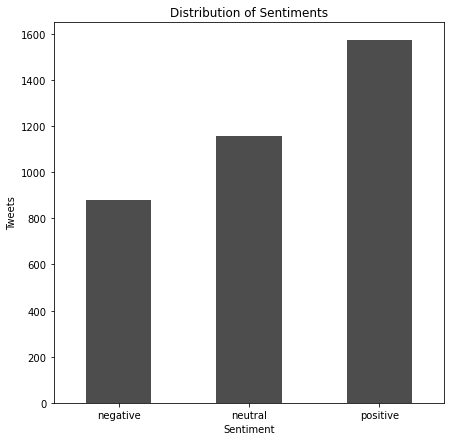

In [31]:
# Columns to analyze with histograms
tweet_filter_loc['sentiment'].value_counts().sort_index().plot(
    kind='bar',
    color='0.3',
    figsize=(7,7)
)
plt.title('Distribution of Sentiments')
plt.ylabel('Tweets')
plt.xlabel('Sentiment')
plt.xticks(rotation=0) # set axis rotation to normal
plt.show()

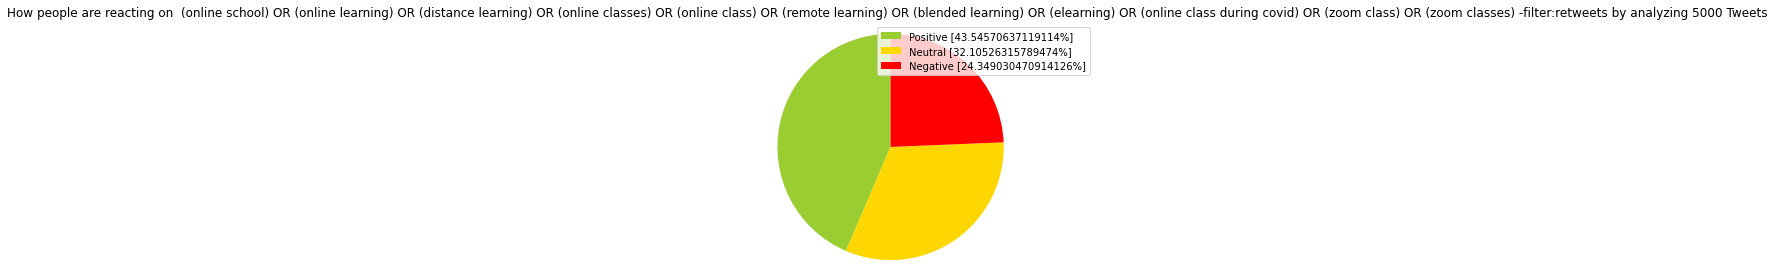

In [32]:
## Print the Pie Chart ##
positive = tweet_filter_loc['sentiment'].value_counts()[0]/len(tweet_filter_loc['sentiment'])*100
neutral = tweet_filter_loc['sentiment'].value_counts()[1]/len(tweet_filter_loc['sentiment'])*100
negative = tweet_filter_loc['sentiment'].value_counts()[2]/len(tweet_filter_loc['sentiment'])*100    
labels = ['Positive ['+str(positive)+'%]', 
          'Neutral ['+str(neutral)+'%]', 
          'Negative ['+str(negative)+'%]']

sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'gold', 'red']
patches, texts = plt.pie(sizes, colors = colors, startangle = 90)
plt.legend(patches, labels, loc = "best")
plt.title('How people are reacting on  '
          +new_search+' by analyzing '
          +str(noOfTweet)+' Tweets ')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [33]:
tw_list_negative = tweet_filter_loc.loc[tweet_filter_loc['sentiment'] == "negative"]
tw_list_positive = tweet_filter_loc.loc[tweet_filter_loc['sentiment'] == "positive"]
tw_list_neutral = tweet_filter_loc.loc[tweet_filter_loc['sentiment'] == "neutral"]

In [34]:
tw_list_negative['tweet'].head()

0     Hire us to do your;\nPsychology\nEssays due\nS...
3     wtf I have gym class on zoom this afternoon, w...
9     @taebear_2013 i was in my online classes, now ...
15    @DrMuradPTI Open the universities. No more onl...
17    Everybody from our department are glued to the...
Name: tweet, dtype: object

In [35]:
import spacy
from spacy.lang.en import English
nlp = spacy.load('en_core_web_sm')

In [36]:
#define stopwords and exclude words like not, no, never for accurate review analysis
all_stopwords = nlp.Defaults.stop_words
all_stopwords.remove('no')
all_stopwords.remove('never')
all_stopwords.remove('not')
print(all_stopwords)

{'except', 'mostly', 'six', 'regarding', 'always', 'three', 'which', '’re', 'everyone', 'what', 'fifty', 'wherever', "'m", 'anyone', 'whoever', 'two', '‘ve', 'afterwards', 'bottom', 'once', 'else', 'several', 'via', 'seems', 'toward', 'our', 'quite', 'top', 'really', 'thence', 'twenty', 'of', 're', 'some', 'nothing', 'yet', 'fifteen', 'throughout', '‘re', 'eight', 'would', 'down', 'another', 'somehow', 'keep', 'has', 'back', 'to', 'if', 'he', 'alone', 'hence', 'less', 'whole', 'there', 'myself', 'others', 'ten', 'together', 'five', 'might', 'who', 'sixty', 'over', 'last', 'you', 'when', 'front', 'beside', 'after', 'amongst', 'is', 'then', 'almost', 'indeed', 'take', 'by', 'more', 'everything', 'been', 'the', 'among', 'nobody', 'now', 'unless', 'go', 'cannot', '‘d', 'already', 'behind', 'their', 'i', 'see', 'against', 'eleven', 'ever', 'from', 'any', 'whether', 'it', 'next', 'whatever', 'very', 'me', 'whereafter', 'same', 'within', 'noone', 'under', 'because', 'further', 'here', 'beyond

Wordcloud of all tweets
Wordcloud of positive tweets
Wordcloud of negative tweets


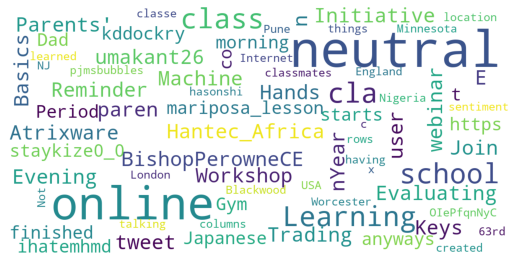

In [41]:
from wordcloud import WordCloud

def display_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white', stopwords=all_stopwords, max_words=200,  max_font_size=40, scale=3, random_state=1).generate(str(data))
    
    fig = plt.figure(1, figsize=(9, 9))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()
    
# print("Wordcloud of all tweets")
# display_wordcloud(tweet_filter_loc["tweet"])

print("Wordcloud of positive tweets")
display_wordcloud(tw_list_positive['tweet'])

print("Wordcloud of negative tweets")
display_wordcloud(tw_list_negative['tweet'])

# print("Wordcloud of neutral tweets")
display_wordcloud(tw_list_neutral['tweet'])

# Part C: Text Analytics pipeline on tweets

## Text Processing

In [42]:
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
# nltk.download('stopwords')
from nltk import word_tokenize 

Removing URL's

In [43]:
# https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/calculate-tweet-word-frequencies-in-python/
def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [44]:
all_tweets_no_urls = [remove_url(tweet) for tweet in tweet_filter_loc['tweet']]
tweet_filter_loc['tweet']= all_tweets_no_urls

<ipython-input-44-0b5518d71cb6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_filter_loc['tweet']= all_tweets_no_urls


### Removing punctuation

In [45]:
#function to remove punctuation
def remove_punctuation(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return nopunc

In [56]:
punc_removed_tw= [remove_punctuation(tweet) for tweet in tweet_filter_loc['tweet']]
# punc_removed_tw[0:5]
tweet_filter_loc['tweet']= punc_removed_tw
# punc_removed_tw

<ipython-input-56-6ae561bcc59c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_filter_loc['tweet']= punc_removed_tw


### Removing tweets with only digits

In [57]:
#function to remove digits
def remove_numbers(text):
    return''.join([i for i in text if not i.isdigit()])

In [58]:
num_removed_tw= [remove_numbers(tweet) for tweet in tweet_filter_loc['tweet']]
# num_removed_tw[0:5]
tweet_filter_loc['tweet']= num_removed_tw

<ipython-input-58-79f31553ee57>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_filter_loc['tweet']= num_removed_tw


### Replacing Abbreviations

In [59]:
# https://www.kaggle.com/life2short/data-processing-replace-abbreviation-of-word

replace_abbreviation_dict={
    "it's": "it is",
    "what's":"what is",
    "what're":"what are",
    "who's":"who is",
    "who're":"who are",
    "where's":"where is",
    "where're":"where are",
    "when's":"when is",
    "when're":"when are",
    "how's":"how is",
    "how're":"how are",

    "i'm":"i am",
    "we're":"we are",
    "you're":"you are",
    "they're":"they are",
    "it's":"it is",
    "he's":"he is",
    "she's":"she is",
    "that's":"that is",
    "there's":"there is",
    "there're":"there are",
    "tbh":"to be honest",

    "i've":"i have",
    "we've":"we have",
    "you've":"you have",
    "they've":"they have",
    "who've":"who have",
    "would've":"would have",
    "not've":"not have",

    "i'll":"i will",
    "we'll":"we will",
    "you'll":"you will",
    "he'll":"he will",
    "she'll":"she will",
    "it'll":"it will",
    "they'll":"they will",

    "isn't":"is not",
    "wasn't":"was not",
    "aren't":"are not",
    "weren't":"were not",
    "can't":"can not",
    "couldn't":"could not",
    "don't":"do not",
    "didn't":"did not",
    "shouldn't":"should not",
    "wouldn't":"would not",
    "doesn't":"does not",
    "haven't":"have not",
    "hasn't":"has not",
    "hadn't":"had not",
    "hmu":"hit me up",
    "won't":"will not",
}

In [60]:
tweet_filter_loc.shape

(3610, 5)

In [80]:
print(tweet_filter_loc["tweet"][2093]) 

Teachers whatever specialty or level they teach always wants best for their students This is just an example how much we go through so much just to keep the quality and the standard that we want our students to have despite everyone adjusting to online learning


In [83]:
tweet_filter_loc["tweet"] = tweet_filter_loc["tweet"].replace(replace_abbreviation_dict, regex=True) 

<ipython-input-83-cff23190948c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_filter_loc["tweet"] = tweet_filter_loc["tweet"].replace(replace_abbreviation_dict, regex=True)


In [86]:
print("Abbreviations removed")
print(tweet_filter_loc["tweet"][2093]) 

Abbreviations removed
Teachers whatever specialty or level they teach always wants best for their students This is just an example how much we go through so much just to keep the quality and the standard that we want our students to have despite everyone adjusting to online learning


### Change all tweets to lower case

In [87]:
#function to convert text to lowercase
def toLower(text):
    return text.lower()

In [89]:
lower_tw= [toLower(tweet) for tweet in tweet_filter_loc['tweet']]
# lower_tw[0:5]
tweet_filter_loc['tweet']= lower_tw

<ipython-input-89-a69877bc1d92>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_filter_loc['tweet']= lower_tw


In [90]:
lower_tw[0]

'hire us to do yourpsychologyessays duesociologyenglish paperhistorynursing payeconomicsmathlabbiologybusinessstatisticsphilosophyassignments duecalculus mathhomeworkonline classesexamsexcel financesociology'

### Stop word removal, Tokenization and Lemmatization

In [91]:
#function to lemmatize text
def lemmatize(text):
    tokens = nlp(text) # Tokenize with SpaCy
    return [t.lemma_ for t in tokens if t not in all_stopwords] #Removes stop words

In [92]:
tweet_filter_loc["lemm_tokens"] = tweet_filter_loc["tweet"].apply(lambda x: lemmatize(str(x)))

<ipython-input-92-4b8658c4fd15>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_filter_loc["lemm_tokens"] = tweet_filter_loc["tweet"].apply(lambda x: lemmatize(str(x)))


Data dump

In [93]:
import pickle #to load pickled data

In [95]:
#open a file, where you ant to store the data
file = open('./data/filtered_data.p', 'wb')

# dump information to that file
pickle.dump(tweet_filter_loc, file)

file.close()

In [96]:
with open("./data/filtered_data.p", 'rb') as pickle_file:
    filtered_data = pickle.load(pickle_file)

In [97]:
# type(filtered_data)

pandas.core.frame.DataFrame

In [76]:
# !pip install geopy
# !pip install gmplot

In [98]:
# https://stackabuse.com/accessing-the-twitter-api-with-python/

from geopy.geocoders import Nominatim
import gmplot

geolocator = Nominatim(user_agent="x124@bla.com")

# Go through all tweets and add locations to 'coordinates' dictionary
coordinates = {'latitude': [], 'longitude': []}
for count, user_loc in enumerate(filtered_data.location):
    try:
        location = geolocator.geocode(user_loc)
        
        # If coordinates are found for location
        if location:
            coordinates['latitude'].append(location.latitude)
            coordinates['longitude'].append(location.longitude)
            
    # If too many connection requests
    except:
        pass
    
# Instantiate and center a GoogleMapPlotter object to show our map
gmap = gmplot.GoogleMapPlotter(30, 0, 3)

# Insert points on the map passing a list of latitudes and longitudes
gmap.heatmap(coordinates['latitude'], coordinates['longitude'], radius=20)

# Save the map to html file
gmap.draw("tweet_heatmap.html")

### Data Representation and Feature Extraction

In [99]:
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
# newData = list(cleaned_data['lemm_tokens'])

In [29]:
# type(newData)

list

Reducing dimension

In [117]:
with open("./data/filtered_data.p", 'rb') as pickle_file:
    new_data = pickle.load(pickle_file)

In [118]:
# list_prep_data = [str(t) for t in new_data.lemm_tokens]    
prep_data = [" ".join(t) for t in new_data["lemm_tokens"]]

In [113]:
type(prep_data)

list

In [114]:
type(list_prep_data[0])

str

In [126]:
# from sklearn.model_selection import train_test_split

# X_data, X_reduced, y_data, y_reduced = train_test_split(prep_data, prep_data["sentiment"], test_size=1000, random_state=42, stratify=new_data["sentiment"])

In [102]:
# token_data = X_reduced['lemm_tokens']

In [103]:
# token_data.to_list

<bound method IndexOpsMixin.tolist of 1969    [conwayvinny, good, luck, I, never, sleep, whe...
1821                          [online, class, suck, bruh]
2976    [pay, we, to, do, youressay, dueonline, class,...
1843    [incpunjab, incindiaunder, chief, minister, ca...
1315    [iijoelxj, I, do, online, school, lol, it, ai,...
                              ...                        
844     [how, have, national, coalition, find, the, sh...
3674    [I, truly, do, nt, understand, tyra, when, you...
1538    [cdc, study, find, mental, physical, impact, o...
4379    [a, deep, and, endure, understanding, of, frac...
1557    [xxaangelique, be, you, look, for, someone, to...
Name: lemm_tokens, Length: 1000, dtype: object>

In [104]:
# type(token_data)

pandas.core.series.Series

Count vectorizer

In [119]:
#function to return vector representation matrix

def return_vector_matrix(vector, X_train):
    feature_names = vector.get_feature_names()
    dense_vector = X_train.todense()
    dense_list = dense_vector.tolist()
    return pd.DataFrame(dense_list, columns=feature_names)

def print_features(vector):
    features_count_vector= vector.get_feature_names()
    print()
    print("Total number of features : {}".format(len(features_count_vector)))
    print("First 30 Features: \n{}".format(features_count_vector[:30]))
    print("Features 2000 to 2030: \n {}".format(features_count_vector[2000:2030]))
    print("Every 4000th feature: \n {}".format(features_count_vector[::4000]))


In [120]:
# print(ex)
count_vector = CountVectorizer().fit(prep_data)
X_train_count_vector = count_vector.transform(prep_data)
# print("X_train Count Vectorizer :\n{}".format(repr(X_train_count_vector)))
# mat = return_vector_matrix(count_vector,X_train_count_vector)
# print(mat.head(10))
# print_features(count_vector)

In [121]:
min_bounded_count_vector = CountVectorizer(min_df=5).fit(prep_data)
X_train_min_bounded_count_vector = min_bounded_count_vector.transform(prep_data)
print("X_train Count Vectorizer :\n{}".format( repr (X_train_min_bounded_count_vector)))
print_features(min_bounded_count_vector)

X_train Count Vectorizer :
<3610x1603 sparse matrix of type '<class 'numpy.int64'>'
	with 58652 stored elements in Compressed Sparse Row format>

Total number of features : 1603
First 30 Features: 
['aamu', 'able', 'about', 'absolute', 'absolutely', 'abt', 'abuse', 'academic', 'academicsonline', 'accept', 'access', 'accord', 'account', 'accounting', 'accountingonline', 'accountingquizonline', 'accuratewrite', 'accuratewriter', 'ace', 'achieve', 'achievement', 'across', 'act', 'acting', 'action', 'active', 'activity', 'actually', 'ad', 'adapt']
Features 2000 to 2030: 
 []
Every 4000th feature: 
 ['aamu']


In [ ]:
# bounded_count_vector = CountVectorizer(min_df=5,max_df=0.4).fit(prep_data)
# X_train_bounded_count_vector = bounded_count_vector.transform(prep_data)
# print("X_train Count Vectorizer :\n{}".format(repr(X_train_bounded_count_vector)))
# print_features(bounded_count_vector)

# #not much diff in features so we ignore

###

Count vectorizer bigram

In [122]:
#bigram with bounded vector
bigram_bounded_cv = CountVectorizer(min_df=5,max_df=0.5, ngram_range=(1,2)).fit(prep_data)
X_train_bigram_bounded_cv = bigram_bounded_cv.transform(prep_data)
print("X_train Count Vectorizer :\n{}".format( repr (X_train_bigram_bounded_cv)))
print_features(bigram_bounded_cv)

X_train Count Vectorizer :
<3610x3726 sparse matrix of type '<class 'numpy.int64'>'
	with 83339 stored elements in Compressed Sparse Row format>

Total number of features : 3726
First 30 Features: 
['aamu', 'aamu txst', 'able', 'able to', 'about', 'about an', 'about how', 'about it', 'about online', 'about our', 'about that', 'about the', 'about this', 'about to', 'about your', 'absolute', 'absolutely', 'abt', 'abuse', 'academic', 'academic dm', 'academic help', 'academic online', 'academic paper', 'academic writing', 'academicsonline', 'academicsonline classessay', 'accept', 'access', 'access to']
Features 2000 to 2030: 
 ['move on', 'move to', 'movement', 'movie', 'ms', 'much', 'music', 'must', 'must be', 'mute', 'my', 'my class', 'my classmate', 'my favorite', 'my first', 'my friend', 'my grade', 'my homework', 'my homeworkonline', 'my homeworkonlineclass', 'my kid', 'my laptop', 'my last', 'my life', 'my link', 'my mathlabecampussocial', 'my mic', 'my mom', 'my online', 'my phone']

Count vectorizer trigram

In [123]:
#trigram with bounded vector
trigram_bounded_cv = CountVectorizer(min_df=5,max_df=0.5, ngram_range=(1,3)).fit(prep_data)
X_train_trigram_bounded_cv = trigram_bounded_cv.transform(prep_data)
print("X_train Count Vectorizer :\n{}".format( repr(X_train_trigram_bounded_cv)))
print_features(trigram_bounded_cv)

X_train Count Vectorizer :
<3610x4960 sparse matrix of type '<class 'numpy.int64'>'
	with 96577 stored elements in Compressed Sparse Row format>

Total number of features : 4960
First 30 Features: 
['aamu', 'aamu txst', 'aamu txst hu', 'able', 'able to', 'able to attend', 'about', 'about an', 'about an med', 'about how', 'about it', 'about online', 'about our', 'about that', 'about the', 'about this', 'about to', 'about your', 'absolute', 'absolutely', 'abt', 'abuse', 'academic', 'academic dm', 'academic dm we', 'academic help', 'academic help here', 'academic online', 'academic online classassignmentseconomic', 'academic paper']
Features 2000 to 2030: 
 ['here to', 'hey', 'hey thereneed', 'hey thereneed any', 'hi', 'hi buddy', 'hi buddy do', 'hi do', 'hi do you', 'hi would', 'hi would love', 'high', 'high grade', 'high grade whatsapp', 'high quality', 'high school', 'high school student', 'highly', 'hindi', 'hindu', 'hindu university', 'hire', 'hire an', 'hire an expert', 'hire our', 

TF-IDF

In [124]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [125]:
tfidf_vector=TfidfVectorizer()
X_train_tfidf_vector=tfidf_vector.fit_transform(prep_data)
print("X_train tfidf:\n{}".format(repr(X_train_tfidf_vector)))
features_tfidf = tfidf_vector.get_feature_names()

print_features(tfidf_vector)

X_train tfidf:
<3610x10694 sparse matrix of type '<class 'numpy.float64'>'
	with 71044 stored elements in Compressed Sparse Row format>

Total number of features : 10694
First 30 Features: 
['aaaa', 'aaaaaaa', 'aaaaaaaa', 'aaaaaaaaa', 'aaaaaaaaaa', 'aaaack', 'aaaand', 'aaahhh', 'aadhysanatani', 'aaj', 'aampm', 'aampms', 'aamu', 'aanbiede', 'aap', 'aapke', 'aasra', 'aastha', 'aatmanirbharbharat', 'aaya', 'ab', 'ababa', 'abbaratie', 'abbot', 'abbs', 'abi', 'ability', 'able', 'about', 'above']
Features 2000 to 2030: 
 ['contain', 'contemplate', 'contemporary', 'content', 'contentlesson', 'contentmarkete', 'contentmarketing', 'contentquestion', 'contestant', 'continue', 'continuity', 'continuous', 'continuously', 'contraction', 'contrary', 'contrast', 'contribute', 'control', 'convention', 'converge', 'conversation', 'converse', 'conversion', 'convert', 'convinced', 'conwayvinny', 'cook', 'cookiethank', 'cooking', 'cooksley']
Every 4000th feature: 
 ['aaaa', 'guidancecontact', 'reward']


In [127]:
# find maximum value for each of the features over the dataset
max_value = X_train_tfidf_vector.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
# get feature names
feature_names = np.array(features_tfidf)

print("Features with lowest tfidf:\n{}".format(
    feature_names[sorted_by_tfidf[:20]]))

print("Features with highest tfidf: \n{}".format(
    feature_names[sorted_by_tfidf[-20:]]))


Features with lowest tfidf:
['sexyrobotnik' 'patriotgamer' 'christiemalry' 'besfrt' 'bobootobian'
 'genkislime' 'yourpalbilly' 'hidiive' 'sweetbillyv' 'achtungmaybe'
 'phuketamine' 'starscape' 'jimmyzloser' 'sansculottestoo'
 'jimdavisphilly' 'beansnbop' 'nihilishtick' 'theclickpit' 'jbonniego'
 'realbillyzabka']
Features with highest tfidf: 
['pay' 'fucking' 'face' 'later' 'ugh' 'bink' 'nanaman' 'osiris'
 'nayutavisual' 'agang' 'mzraot' 'bobo' 'markleebase' 'mamamoo' 'lovehate'
 'zumba' 'yarn' 'parhleatia' 'zvtoprqzuztuk' 'hay']


In [128]:
#display inf features with lowest inverse doc freq (appearing too often, so considered less important)

sorted_by_idf = np.argsort(tfidf_vector.idf_)
print("Features with lowest idf:\n{}".format(
        feature_names[sorted_by_idf[:100]]))

Features with lowest idf:
['online' 'class' 'to' 'be' 'and' 'the' 'for' 'in' 'of' 'do' 'we' 'school'
 'my' 'you' 'have' 'your' 'on' 'with' 'at' 'help' 'get' 'nt' 'this'
 'learning' 'that' 'but' 'so' 'it' 'our' 'zoom' 'learn' 'an' 'all' 'essay'
 'just' 'dm' 'pay' 'not' 'assignment' 'student' 'time' 'or' 'from' 'work'
 'go' 'can' 'how' 'good' 'need' 'like' 'now' 'paper' 'they' 'by' 'amp'
 'more' 'up' 'will' 'its' 'year' 'if' 'about' 'someone' 'remote' 'as'
 'when' 'out' 'take' 'make' 'research' 'grade' 'back' 'today' 'one' 'day'
 'here' 'course' 'teacher' 'duepay' 'homework' 'no' 'look' 'during'
 'quality' 'what' 'due' 'case' 'write' 'philosophy' 'start' 'because' 'ca'
 'free' 'any' 'want' 'still' 'use' 'see' 'expert' 'handle']


TF-IDF bounded

In [129]:
tfidf_bounded_vector=TfidfVectorizer(min_df=5)
X_train_bounded_tfidf_vector=tfidf_bounded_vector.fit_transform(prep_data)
print("X_train tfidf:\n{}".format(repr(X_train_bounded_tfidf_vector)))
features_bounded_tfidf = tfidf_bounded_vector.get_feature_names()

print_features(tfidf_bounded_vector)

X_train tfidf:
<3610x1603 sparse matrix of type '<class 'numpy.float64'>'
	with 58652 stored elements in Compressed Sparse Row format>

Total number of features : 1603
First 30 Features: 
['aamu', 'able', 'about', 'absolute', 'absolutely', 'abt', 'abuse', 'academic', 'academicsonline', 'accept', 'access', 'accord', 'account', 'accounting', 'accountingonline', 'accountingquizonline', 'accuratewrite', 'accuratewriter', 'ace', 'achieve', 'achievement', 'across', 'act', 'acting', 'action', 'active', 'activity', 'actually', 'ad', 'adapt']
Features 2000 to 2030: 
 []
Every 4000th feature: 
 ['aamu']


In [130]:
# find maximum value for each of the features over the dataset
max_value = X_train_bounded_tfidf_vector.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
# get feature names
feature_bounded_tfidf_names = np.array(features_bounded_tfidf)

print("Features with lowest tfidf:\n{}".format(
    feature_bounded_tfidf_names[sorted_by_tfidf[:20]]))

print("Features with highest tfidf: \n{}".format(
    feature_bounded_tfidf_names[sorted_by_tfidf[-20:]]))

print("=======================================================================")

#display inf features with lowest inverse doc freq (appearing too often, so considered less important)

sorted_by_idf = np.argsort(tfidf_bounded_vector.idf_)
print("Features with lowest idf:\n{}".format(
        feature_bounded_tfidf_names[sorted_by_idf[:100]]))

Features with lowest tfidf:
['availablepay' 'hu' 'shsu' 'uncg' 'jcsu' 'cau' 'nccu' 'selu' 'morehouse'
 'includeddm' 'koechmaiywaicloudcom' 'lmu' 'imessage' 'wssu' 'myasu' 'vsu'
 'famu' 'uwg' 'fusion' 'coursescomplete']
Features with highest tfidf: 
['late' 'sa' 'fucking' 'face' 'tired' 'later' 'today' 'hai' 'pack' 'ni'
 'elearne' 'ga' 'ugh' 'ap' 'fuck' 'classphilosophypsychologymathcalculus'
 'class' 'of' 'online' 'to']
Features with lowest idf:
['online' 'class' 'to' 'be' 'and' 'the' 'for' 'in' 'of' 'do' 'we' 'school'
 'my' 'you' 'have' 'your' 'on' 'with' 'at' 'help' 'get' 'nt' 'this'
 'learning' 'that' 'but' 'so' 'it' 'our' 'learn' 'zoom' 'an' 'all' 'essay'
 'just' 'dm' 'pay' 'not' 'assignment' 'student' 'or' 'from' 'time' 'work'
 'go' 'can' 'how' 'good' 'need' 'like' 'now' 'paper' 'they' 'by' 'amp'
 'more' 'up' 'will' 'its' 'year' 'if' 'about' 'someone' 'remote' 'as'
 'when' 'out' 'take' 'make' 'research' 'grade' 'back' 'today' 'one' 'here'
 'day' 'course' 'teacher' 'homework' 'duep

TF-IDF bigram

In [131]:
tfidf_bigram_vector=TfidfVectorizer(min_df=5, ngram_range=(1,2))
X_train_bigram_tfidf_vector=tfidf_bigram_vector.fit_transform(prep_data)
print("X_train tfidf:\n{}".format(repr(X_train_bigram_tfidf_vector)))
features_bigram_tfidf = tfidf_bigram_vector.get_feature_names()

print_features(tfidf_bigram_vector)

X_train tfidf:
<3610x3728 sparse matrix of type '<class 'numpy.float64'>'
	with 87524 stored elements in Compressed Sparse Row format>

Total number of features : 3728
First 30 Features: 
['aamu', 'aamu txst', 'able', 'able to', 'about', 'about an', 'about how', 'about it', 'about online', 'about our', 'about that', 'about the', 'about this', 'about to', 'about your', 'absolute', 'absolutely', 'abt', 'abuse', 'academic', 'academic dm', 'academic help', 'academic online', 'academic paper', 'academic writing', 'academicsonline', 'academicsonline classessay', 'accept', 'access', 'access to']
Features 2000 to 2030: 
 ['move', 'move on', 'move to', 'movement', 'movie', 'ms', 'much', 'music', 'must', 'must be', 'mute', 'my', 'my class', 'my classmate', 'my favorite', 'my first', 'my friend', 'my grade', 'my homework', 'my homeworkonline', 'my homeworkonlineclass', 'my kid', 'my laptop', 'my last', 'my life', 'my link', 'my mathlabecampussocial', 'my mic', 'my mom', 'my online']
Every 4000th 

In [132]:
# find maximum value for each of the features over the dataset
max_value = X_train_bigram_tfidf_vector.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()

# get feature names
feature_bigram_tfidf_names = np.array(features_bigram_tfidf)

print("Features with lowest tfidf:\n{}".format(
    feature_bigram_tfidf_names[sorted_by_tfidf[:20]]))

print("Features with highest tfidf: \n{}".format(
    feature_bigram_tfidf_names[sorted_by_tfidf[-20:]]))

print("=======================================================================")

#display inf features with lowest inverse doc freq (appearing too often, so considered less important)

sorted_by_idf = np.argsort(tfidf_bigram_vector.idf_)
print("Features with lowest idf:\n{}".format(
        feature_bigram_tfidf_names[sorted_by_idf[:100]]))

Features with lowest tfidf:
['hu csu' 'shsu selu' 'shsu' 'txst hu' 'txsu uncg' 'su morehouse' 'uncg'
 'uncg gsu' 'includeddm or' 'myasu nccu' 'includeddm' 'selu'
 'imessage koechmaiywaicloudcom' 'imessage' 'uwg ncat' 'nccu cau' 'vsu su'
 'hu' 'nccu' 'lmu myasu']
Features with highest tfidf: 
['stuff' 'late' 'later' 'hai' 'ni' 'pack' 'ga' 'ugh' 'ap' 'tired'
 'class online' 'spanish' 'lol' 'fucking' 'today' 'elearne' 'online' 'to'
 'of' 'class']
Features with lowest idf:
['online' 'class' 'to' 'be' 'online class' 'and' 'the' 'for' 'in' 'of'
 'do' 'we' 'school' 'my' 'you' 'have' 'your' 'on' 'with' 'at' 'help' 'get'
 'nt' 'this' 'learning' 'that' 'but' 'so' 'it' 'our' 'learn' 'zoom' 'an'
 'essay' 'all' 'just' 'dm' 'pay' 'not' 'assignment' 'student' 'from'
 'do nt' 'or' 'time' 'work' 'go' 'can' 'how' 'good' 'online school' 'need'
 'like' 'now' 'paper' 'they' 'by' 'amp' 'more' 'up' 'will' 'its' 'year'
 'if' 'about' 'someone' 'remote' 'as' 'zoom class' 'when' 'out' 'to do'
 'take' 'make' 'res

TF-IDF trigram

In [133]:
tfidf_trigram_vector=TfidfVectorizer(min_df=5, ngram_range=(1,3))
X_train_trigram_tfidf_vector=tfidf_trigram_vector.fit_transform(prep_data)
print("X_train tfidf:\n{}".format(repr(X_train_trigram_tfidf_vector)))
features_trigram_tfidf = tfidf_trigram_vector.get_feature_names()

print_features(tfidf_trigram_vector)

X_train tfidf:
<3610x4962 sparse matrix of type '<class 'numpy.float64'>'
	with 100762 stored elements in Compressed Sparse Row format>

Total number of features : 4962
First 30 Features: 
['aamu', 'aamu txst', 'aamu txst hu', 'able', 'able to', 'able to attend', 'about', 'about an', 'about an med', 'about how', 'about it', 'about online', 'about our', 'about that', 'about the', 'about this', 'about to', 'about your', 'absolute', 'absolutely', 'abt', 'abuse', 'academic', 'academic dm', 'academic dm we', 'academic help', 'academic help here', 'academic online', 'academic online classassignmentseconomic', 'academic paper']
Features 2000 to 2030: 
 ['here essay online', 'here to', 'hey', 'hey thereneed', 'hey thereneed any', 'hi', 'hi buddy', 'hi buddy do', 'hi do', 'hi do you', 'hi would', 'hi would love', 'high', 'high grade', 'high grade whatsapp', 'high quality', 'high school', 'high school student', 'highly', 'hindi', 'hindu', 'hindu university', 'hire', 'hire an', 'hire an expert', 

In [134]:
# find maximum value for each of the features over the dataset
max_value = X_train_trigram_tfidf_vector.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
# get feature names
feature_trigram_tfidf_names = np.array(features_trigram_tfidf)

print("Features with lowest tfidf:\n{}".format(
    feature_trigram_tfidf_names[sorted_by_tfidf[:20]]))

print("Features with highest tfidf: \n{}".format(
    feature_trigram_tfidf_names[sorted_by_tfidf[-20:]]))

print("=======================================================================")

#displayinf features with lowest inverse doc freq (appearing too often, so considered less important)

sorted_by_idf = np.argsort(tfidf_trigram_vector.idf_)
print("Features with lowest idf:\n{}".format(
        feature_trigram_tfidf_names[sorted_by_idf[:100]]))

Features with lowest tfidf:
['su morehouse' 'jsu vsu' 'for help fvsu' 'jsu vsu su' 'selu'
 'math includeddm or' 'math includeddm' 'ssu uwg' 'shsu' 'shsu selu'
 'imessage koechmaiywaicloudcom for' 'nccu cau wssu'
 'imessage koechmaiywaicloudcom' 'uncg gsu famu' 'uncg gsu' 'ssu uwg ncat'
 'famu aamu txst' 'csu lmu' 'csu lmu myasu' 'txsu uncg gsu']
Features with highest tfidf: 
['stuff' 'late' 'later' 'hai' 'ni' 'pack' 'ga' 'ugh' 'tired' 'ap'
 'class online' 'spanish' 'lol' 'fucking' 'today' 'elearne' 'class'
 'online' 'to' 'of']
Features with lowest idf:
['online' 'class' 'to' 'be' 'online class' 'and' 'the' 'for' 'in' 'of'
 'do' 'we' 'school' 'my' 'you' 'have' 'your' 'on' 'with' 'at' 'help' 'get'
 'nt' 'this' 'learning' 'that' 'but' 'so' 'it' 'our' 'learn' 'zoom' 'an'
 'all' 'essay' 'just' 'dm' 'pay' 'not' 'assignment' 'student' 'do nt'
 'time' 'or' 'from' 'work' 'go' 'can' 'how' 'good' 'online school' 'need'
 'like' 'now' 'paper' 'they' 'by' 'amp' 'more' 'up' 'will' 'its' 'year'
 'if' 

TSNE Representation of vectors

In [135]:
import sklearn
from sklearn.model_selection import train_test_split

X_data, X_tsne, y_data, y_tsne = train_test_split(data["tokens"], data["Score"], test_size=1000, random_state=42, stratify=data["Score"])

NameError: name 'data' is not defined

In [ ]:
print(X_tsne.shape)
tsne_data = [" ".join(t) for t in X_tsne] 
print(tsne_data)

In [ ]:
from sklearn.preprocessing import MaxAbsScaler
import seaborn as sn
from sklearn.manifold import TSNE
from time import time
    
def plot_tsne(X_train, title):

    standardized_data = MaxAbsScaler().fit_transform(X_train).todense() #standardize the data before applying tsne 
    model = TSNE(n_components=2, random_state=0)
    # configuring the parameteres
    # the number of components = 2
    # default perplexity = 30
    # default learning rate = 200
    # default Maximum number of iterations for the optimization = 1000

    tsne_data = model.fit_transform(standardized_data)

    # creating a new data frame which help us in ploting the result data
    tsne_data = np.vstack((tsne_data.T, y_tsne)).T
    tsne_df = pd.DataFrame(data= tsne_data, columns=("Dim_1", "Dim_2", "Score"))

    # Ploting the result of tsne
    sn.FacetGrid(tsne_df, hue="Score", height=5).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
    plt.title(title)
    plt.show()


Count vect TSNE visualization

In [ ]:
unigram_tsne_cv = CountVectorizer(min_df=5).fit(tsne_data)
X_train_tsne_unigram = unigram_tsne_cv.transform(tsne_data)
print("the shape of out text BOW vectorizer ", X_train_tsne_unigram.get_shape())
print("X_train Count Vectorizer :\n{}".format( repr(X_train_tsne_unigram)))
print_features(unigram_tsne_cv)
plot_tsne(X_train_tsne_unigram, "Count Vectorizer TSNE visualization")


TF-IDF TSNE visualization

In [ ]:
unigram_tsne_tfidf=TfidfVectorizer(min_df=5)
X_train_unigram_tsne_tfidf=unigram_tsne_tfidf.fit_transform(tsne_data)
print("X_train tfidf:\n{}".format(repr(X_train_unigram_tsne_tfidf)))
tfidf_tsne_features = unigram_tsne_tfidf.get_feature_names()

print_features(unigram_tsne_tfidf)
plot_tsne(X_train_unigram_tsne_tfidf, "TFIDF TSNE visualization")

In [ ]:
X_data, X_reduced, y_data, y_reduced = train_test_split(data, data["Score"], test_size=3000, random_state=42, stratify=data["Score"])